In [2]:

import pandas as pd

In [3]:
file = pd.read_csv('valid_and_test_moth_classification_hie_136.csv', sep='\t')

In [4]:
file

,file,true_spc_id,pred_spc_id,true_spc_name,pred_spc_name,probs_spc,true_gns_id,pred_gns_id,true_gns_name,pred_gns_name,probs_gns,true_fml_id,pred_fml_id,true_fml_name,pred_fml_name,probs_fml
0,A55-20160614-117.jpg,1419,1419,Marumba saishiuana formosana,Marumba saishiuana formosana,82.95,696,696,Marumba,Marumba,99.47,45,45,Sphingidae,Sphingidae,99.81
1,A48-20160601-150.jpg,1975,1975,Pseudargyria interruptella,Pseudargyria interruptella,75.22,996,996,Pseudargyria,Pseudargyria,93.87,9,9,Crambidae,Crambidae,99.45
2,A46-20160705-187.jpg,1249,1249,Kamalia tattakana,Kamalia tattakana,94.66,607,607,Kamalia,Kamalia,99.25,33,33,Notodontidae,Notodontidae,99.97
3,A61-20180327-057.jpg,2195,2195,Spilarctia wilemani,Spilarctia wilemani,98.05,1120,1120,Spilarctia,Spilarctia,99.81,15,15,Erebidae,Erebidae,99.99
4,A32-20180721-099.jpg,2446,2446,Yashmakia suffusa,Yashmakia suffusa,81.85,1272,1272,Yashmakia,Yashmakia,96.43,19,19,Geometridae,Geometridae,99.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19524,V37-20181008-044.jpg,2436,2436,Xestia flavilinea,Xestia flavilinea,26.98,1267,1267,Xestia,Xestia,99.23,31,31,Noctuidae,Noctuidae,100.00
19525,V12-20131128-100.jpg,2440,2441,Xylena sugii,Xylena tatajiana tatajiana,29.31,1268,1268,Xylena,Xylena,91.08,31,31,Noctuidae,Noctuidae,99.94
19526,V31-20170415-097.jpg,2453,2454,Zeuzera indica,Zeuzera multistrigata,25.88,1276,1276,Zeuzera,Zeuzera,85.33,8,8,Cossidae,Cossidae,70.99
19527,A35-20170425-244.jpg,2456,193,Zizeeria maha okinawana,Arbudas submacula,15.36,1278,604,Zizeeria,Jamides,16.55,29,29,Lycaenidae,Lycaenidae,93.34


In [5]:
df1 = file.drop(columns = ['file', 'probs_spc', 'true_gns_id', 'pred_gns_id', 'true_gns_name', 'pred_gns_name', 'probs_gns'])

In [6]:
df = df1.drop(columns = ['true_fml_id', 'pred_fml_id', 'true_fml_name', 'pred_fml_name', 'probs_fml'])

In [7]:
df

,true_spc_id,pred_spc_id,true_spc_name,pred_spc_name
0,1419,1419,Marumba saishiuana formosana,Marumba saishiuana formosana
1,1975,1975,Pseudargyria interruptella,Pseudargyria interruptella
2,1249,1249,Kamalia tattakana,Kamalia tattakana
3,2195,2195,Spilarctia wilemani,Spilarctia wilemani
4,2446,2446,Yashmakia suffusa,Yashmakia suffusa
...,...,...,...,...
19524,2436,2436,Xestia flavilinea,Xestia flavilinea
19525,2440,2441,Xylena sugii,Xylena tatajiana tatajiana
19526,2453,2454,Zeuzera indica,Zeuzera multistrigata
19527,2456,193,Zizeeria maha okinawana,Arbudas submacula


In [8]:
df.groupby("true_spc_id")

In [9]:
cnt_true = df.groupby('true_spc_id').apply(lambda g: (g.pred_spc_id == g.true_spc_id).sum())
cnt_total = df.groupby('true_spc_id').apply(lambda g: (g.true_spc_id == g.true_spc_id).sum())
cnt_prob = df.groupby('true_spc_id').apply(lambda g: (g.pred_spc_id == g.true_spc_id).sum()/(g.true_spc_id == g.true_spc_id).sum())
df['pred_true'] = df.true_spc_id.map(cnt_true)
df['pred_total'] = df.true_spc_id.map(cnt_total)
df['pred_prob'] = df.true_spc_id.map(cnt_prob)
# df['pred_true'] = df.groupby('true_spc_id').transform(lambda x : (x.pred_spc_id == x.true_spc_id).sum()/x.true_spc_id.sum())

In [10]:
df

,true_spc_id,pred_spc_id,true_spc_name,pred_spc_name,pred_true,pred_total,pred_prob
0,1419,1419,Marumba saishiuana formosana,Marumba saishiuana formosana,2,2,1.000000
1,1975,1975,Pseudargyria interruptella,Pseudargyria interruptella,5,5,1.000000
2,1249,1249,Kamalia tattakana,Kamalia tattakana,7,7,1.000000
3,2195,2195,Spilarctia wilemani,Spilarctia wilemani,85,88,0.965909
4,2446,2446,Yashmakia suffusa,Yashmakia suffusa,11,12,0.916667
...,...,...,...,...,...,...,...
19524,2436,2436,Xestia flavilinea,Xestia flavilinea,2,2,1.000000
19525,2440,2441,Xylena sugii,Xylena tatajiana tatajiana,0,1,0.000000
19526,2453,2454,Zeuzera indica,Zeuzera multistrigata,0,2,0.000000
19527,2456,193,Zizeeria maha okinawana,Arbudas submacula,0,1,0.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


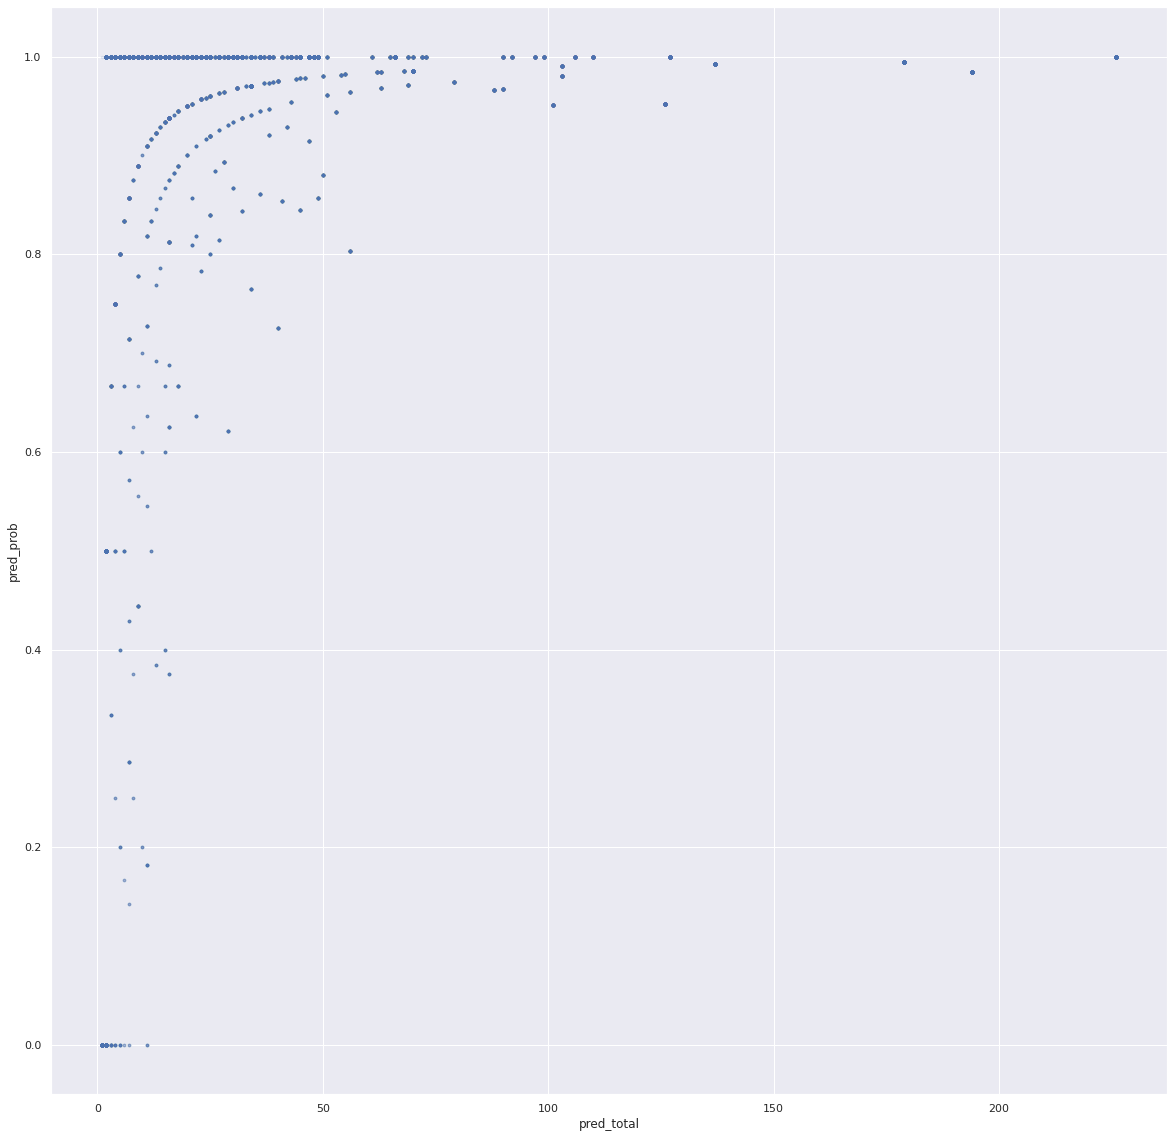

In [11]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
df.plot.scatter(x='pred_total', y='pred_prob', alpha = 0.1, s = 7)

[[ 4  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  3]]


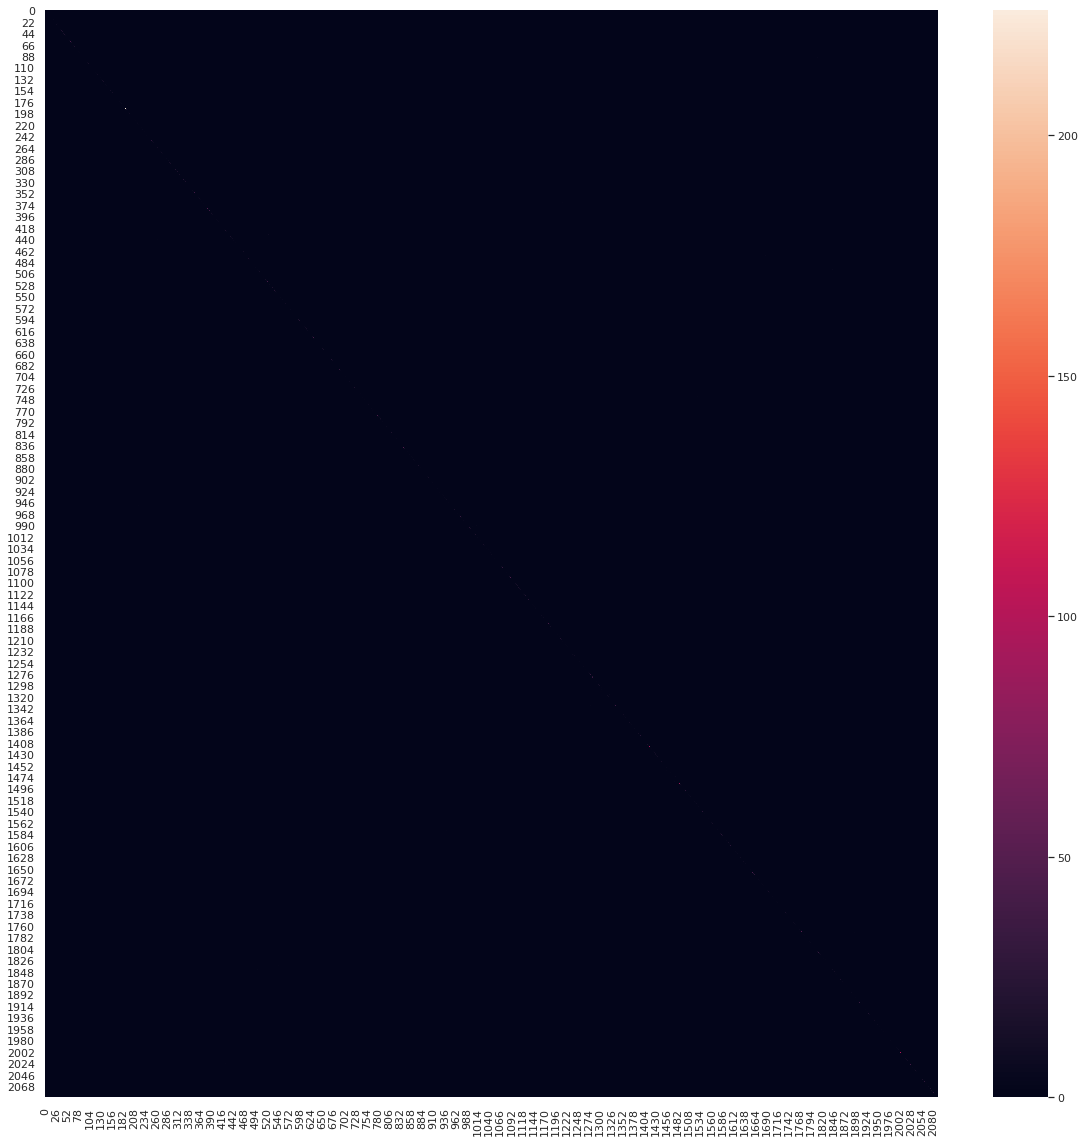

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

sn.set()
# ax=plt.subplots()
Cm= confusion_matrix(df.true_spc_name, df.pred_spc_name)
print(Cm)
sn.heatmap(Cm, annot=False)

# ax.set_title('confusion matrix')
# ax.set_xlabel('predict')
# ax.set_ylabel('true')

In [ ]:
from sklearn.metrics import classification_report

import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
print(classification_report(df.true_spc_name, df.pred_spc_name, target_names=df.true_spc_name))
plt.figure()
cnf_matrix = confusion_matrix(df.true_spc_name, df.pred_spc_name)
plot_confusion_matrix(cnf_matrix, classes=df.true_spc_name)

plt.show()
 